In [1]:
%matplotlib inline

In [2]:
from ssf_code import *

In [3]:
sd.query_devices()

> 0 Built-in Microphone, Core Audio (2 in, 0 out)
< 1 Built-in Output, Core Audio (0 in, 2 out)
  2 Aggregate Device, Core Audio (0 in, 0 out)

* Back to [Introduction](./01_Signals_Sound_and_Filters_Intro.ipynb)

### ACT II, Chapter I
# 1.1 FILTERS

For me, the legacy of electrical engineering in the audio domain is best shown with filters. We'll skip the history leson now, but it's a fascinating story worth looking into.
Electrical filters are used everywhere in audio. As a rule, they have an effect on the level of the signal. Some fundamental general definitions are:
- **Cutoff Frequency** - the frequency at which the filter begins to attenuate.
- **Bandwidth** - pretty self explanatory, but the technical term is "The distance between the $-3dB$ cutoff points on a frequency response curve."
- **Attenuation** - the magnitude by which a signal's strenght is reduced.
- **Gain** - the magnitude by which a signal's strenght is increased.
- **Slope** - the response curve outside the actual pass band, described as $dB\ per\ octave$
- **Q Factor** - A filter's $Q$ factor is an expression of the relative bandwidth: $Q=\frac{f_{res}}{b}$ where $f_{res}$ is the resonance/center frequency, and $b$ is bandwidth.

# 1.2 FILTER TYPES
A short description of the most commonly used filter types:
- **Adaptive filter** - A filter that can adapt itself to a given spectrum, for example a noise spectrum, in order to be subsequently used to remove the noise concerned. Typically based on digital signal proccessing.
- **Bell** - the characteristics of the band-pass filterhave shape of a bell.
- **band-pass filter** - allows a specific frequency range to pass, but attenuates frequencies outside of it,
- **high-pass filter** - allows high frequencies to pass, but low frequencies. The term is interchangably used with **lo-cut** or **bass-cut**
- **low-pass filter** - allows low frequencies to pass, but high frequencies. The term is interchangably used with **hi-cut**.
- **notch filter** - suppresses a very small range of frequencies. The bandwidth is few percentages.
There are also **constant Q/constant bandwidth,  graphic equalizer, octave filter, 1/3 octave filter, peak filter, presence filter, shelving filters, and sweeping filter**.

# 1.3 APPLYING A BASIC FILTER
How do filters work will remain a "black magic". For now, lets load an audio file containing few guitar chords. Then, using ThinkDSP module we'll get to play with a cutoff filtering(an interactive lowpass filter).

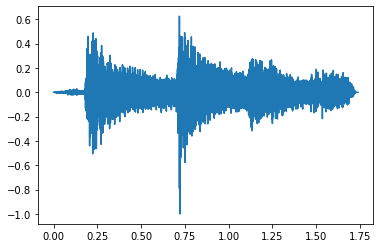

In [4]:
guitar_s1 = read_wave('./_audio/guitar_sample.wav')
guitar_s1.plot()
guitar_s1.make_audio()

In [5]:
from ipywidgets import interact, fixed

def filter_wave(wave, cutoff):
    """Selects a wave and filters it.
    Plots the spectrum and displays an Audio widget.
    wave: Wave object
    cutoff: frequency in Hz
    """
    spectrum = wave.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)
    
interact(filter_wave, wave=fixed(guitar_s1), cutoff=(0, 5000, 100));

interactive(children=(IntSlider(value=2500, description='cutoff', max=5000, step=100), Output()), _dom_classes…

### ACT II, Chapter II
# 2.1 WHAT IS SPECTRUM

We hit the next big milestone. **Spectrum**. What's that? Again, we have [tons of formulations](https://en.wikipedia.org/wiki/Spectrum_(disambiguation)).

In Latin, spectrum means "image". In most modern usages of *spectrum* there is a unifying theme between the extremes at either end. 

In the 17th century, the word *spectrum* was introduced into optics by Sir Isaac Newton, referring to the range of colors observed when white light was dispersed through a prism. Soon the term referred to a plot of light intensity or power as a function of frequency or wavelength(a.k.a. spectral density plot). The term spectrum was expanded to apply to other waves, such as sound waves that could also be measured as a function of frequency. The term now applies to any signal that can be measured or decomposed along a continuous variable. Spectrum is also used to refer to a graphical representation of the signal as a function of the dependent variable.

Any signal that can be represented as a variable that varies in time has a corresponding frequency spectrum.
In the context of this project we assume that:
```
Spectrum is a holistic view(representation) of the entire signal at once.
```
The spectrum doesn't know how things are changing over time. Look at the plot in the prevoius cell. That's the spectrum of the audio sample of the guitar.

Now we'll continue by constructing a wave fith some frequencies that we know.

Expected frequencies in the generated wave: 
100Hz, 1100Hz, 2100Hz, 3100Hz, 4100Hz, 5100Hz, 6100Hz.
Notice that the last frequency is above the limit of our sampling rate.
Expect aliasing artifacts further down the line :)
1105 data points(measurements)


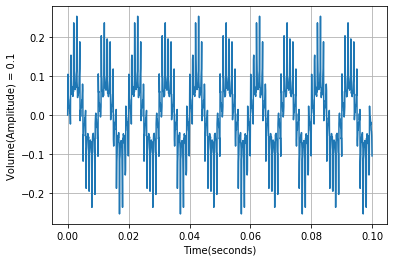

In [6]:
sr = 11050
ampli = .1
# frequencies = [500, 1000, 2000, 3000, 4000, 5000]
frequencies = [100*i for i in range(1, 71, 10)]
fc1 = make_wave(frequencies[0], sample_rate=sr, ampl=ampli)
for i in range(1, len(frequencies)):
    f = make_wave(freq=frequencies[i], sample_rate=sr, ampl=ampli*(1/(i+1)))
    fc1[0] += f[0]

foo = "Hz, ".join(list(map(str, frequencies)))
print(f"Expected frequencies in the generated wave: \n{foo}Hz.")
if frequencies[-1] > sr/2:
    print("Notice that the last frequency is above the limit of our sampling rate.")
    print("Expect aliasing artifacts further down the line :)")
    
plot_play(fc1[0], fc1[1], sr, ampli)

In [7]:
def make_spectrum(wave_data, sample_rate):
    n = len(wave_data)
    T = 1 / sample_rate
    amplitudes = np.fft.fft(wave_data) # FFT makes appearance.
    frequencies = np.fft.fftfreq(n, T)
    return np.absolute(amplitudes), np.absolute(frequencies)

# 2.3 SPECTROGRAM

A **spectrogram** is a visual representation of the frequency spectrum of sound as a function of time(or another variable).

As we've learned already, a sound usually has many different frequencies mixed. A musical tone's timbre is characterized by its harmonic spectrum. Sound in our environment that we refer to as noise includes many different frequencies. (When a sound signal contains a mixture of all audible frequencies, distributed equally over the audio spectrum, it is called white noise.)

There is a way which can be used to convert the sound wave into a visual display of the constituent frequencies. This visual display is referred to as a **spectrogram**. And that's exactly what's comming.

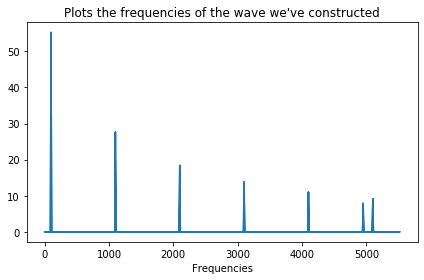

In [8]:
fc1_spectrum = make_spectrum(fc1[0], sr)
plt.plot(fc1_spectrum[1], fc1_spectrum[0])
decorate(xlabel="Frequencies", title="Plots the frequencies of the wave we've constructed")
plt.show()

# 2.3 SPECTRAL DECOMPOSITION

The most important tthing to understand from this whole endeavour is the so called **spectral decomposition**, which is the idea that any signal can be expressed as the sum of sinusoids with different frequencies.

The mathematical tool behind that is the **Discrete Fourier transform**, or **DFT**, which takes a signal and produces its spectrum. The spectrum is the set of sinusoids that add up to produce the signal.

And the most important algorithm(\*) behind that is the **Fast Fourier transform**, or **FFT**, which is an efficient way to compute the DFT.

We'll take an in-depth look into all of these in the [next chapter!](./06_Signals_Sound_and_Filters_A2C3.ipynb)